# Transfer Learning with TensorFlow

In [24]:

# Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

--2023-11-04 07:22:13--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-11-04 07:22:14 (91.3 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [25]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data('10_food_classes_10_percent.zip')

--2023-11-04 07:22:14--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.128.207, 173.194.69.207, 173.194.79.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.128.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M  41.3MB/s    in 4.5s    

2023-11-04 07:22:19 (35.4 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [26]:
walk_through_dir('10_food_classes_10_percent')

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/gr

In [27]:
train_dir = '10_food_classes_10_percent/train/'
test_dir = '10_food_classes_10_percent/test/'

In [28]:
import tensorflow as tf

IMG_SIZE = (224,224)

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(
    directory=train_dir,
    image_size=IMG_SIZE,
    label_mode='categorical'
)


test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(
    directory=test_dir,
    image_size=IMG_SIZE,
    label_mode='categorical'
)


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [29]:
train_data_10_percent

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [30]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

## Model 0

In [31]:
# 1. Create the base model with tf.keras.application

base_model = tf.keras.applications.EfficientNetB0(
    include_top=False
)

# 2. Freaze the base model
base_model.trainable = False

# 3. Create inputs into our model
inputs = tf.keras.layers.Input(shape=(224,224,3),name='input_layer')

# 4. Normalize inputs if its needed.
# x = tf.keras.layers.Rescaling(scale=1/255.)(inputs)

# 5. pass it the model
x = base_model(inputs)
print('base model shape: ',x.shape)

# 6. Aggregate
x = tf.keras.layers.GlobalAveragePooling2D(name='globale_avg_pooling')(x)
print('shape after pooling: ',x.shape)

# 7. Create the output activation
outputs = tf.keras.layers.Dense(10,activation='softmax',name='output_layer')(x)

# 8. Combine the inputs with outputs into the model
model_0 = tf.keras.Model(inputs, outputs)

# 9. Compile the Model
model_0.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# 10. Fit the Model
history_0 = model_0.fit(
    train_data_10_percent,
    epochs=5,
    steps_per_epoch=len(train_data_10_percent),
    validation_data=test_data_10_percent,
    validation_steps=int(0.25*len(test_data_10_percent))
)

base model shape:  (None, 7, 7, 1280)
shape after pooling:  (None, 1280)
Epoch 1/5
24/24 [==============================] - 23s 347ms/step - loss: 1.8083 - accuracy: 0.4560 - val_loss: 1.2374 - val_accuracy: 0.7500
Epoch 2/5
24/24 [==============================] - 6s 209ms/step - loss: 1.0727 - accuracy: 0.7667 - val_loss: 0.8349 - val_accuracy: 0.8273
Epoch 3/5
24/24 [==============================] - 6s 245ms/step - loss: 0.7715 - accuracy: 0.8280 - val_loss: 0.6998 - val_accuracy: 0.8487
Epoch 4/5
24/24 [==============================] - 5s 185ms/step - loss: 0.6319 - accuracy: 0.8560 - val_loss: 0.5916 - val_accuracy: 0.8470
Epoch 5/5
24/24 [==============================] - 8s 305ms/step - loss: 0.5439 - accuracy: 0.8667 - val_loss: 0.5387 - val_accuracy: 0.8651


In [32]:
model_0.evaluate(test_data_10_percent)

79/79 [==============================] - 6s 70ms/step - loss: 0.5534 - accuracy: 0.8604


[0.5534331202507019, 0.8604000210762024]

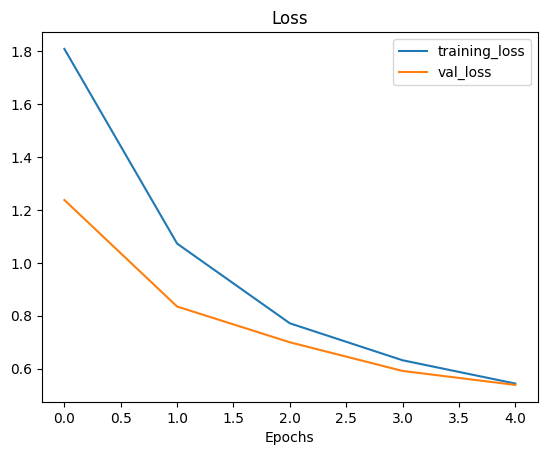

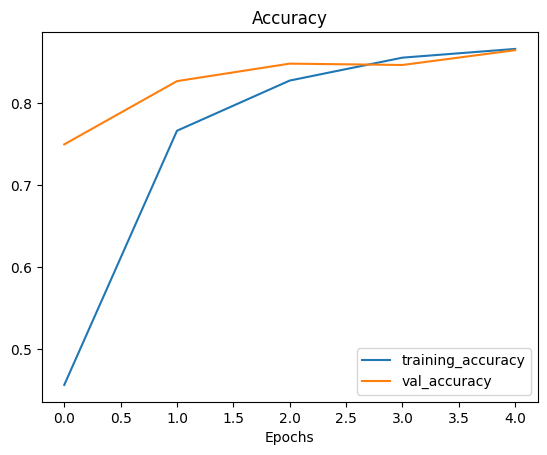

In [33]:
plot_loss_curves(history_0)

## Model 1

feature Extraction transfer learning with 1% of the traiining data with data augmentation

In [34]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

unzip_data('10_food_classes_1_percent.zip')

--2023-11-04 07:23:26--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.207, 108.177.96.207, 108.177.119.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip.1’

10_food_classes_1_p 100%[===================>] 127.42M  39.5MB/s    in 3.7s    

2023-11-04 07:23:30 (34.3 MB/s) - ‘10_food_classes_1_percent.zip.1’ saved [133612354/133612354]



In [35]:
train_dir_1_percent = '10_food_classes_1_percent/train'
test_dir_1_percent = '10_food_classes_1_percent/test'

In [36]:
walk_through_dir('10_food_classes_1_percent')

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There a

In [37]:
IMG_SIZE = (224,224)
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir_1_percent,
    label_mode='categorical',
    image_size = IMG_SIZE,
    batch_size = 32
)

test_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir_1_percent,
    label_mode='categorical',
    image_size = IMG_SIZE,
    batch_size = 32
)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [38]:
data_aug = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.18),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.18),
    tf.keras.layers.experimental.preprocessing.RandomHeight(0.18),
    tf.keras.layers.experimental.preprocessing.RandomWidth(0.18),
    ],name='data_augmentation')

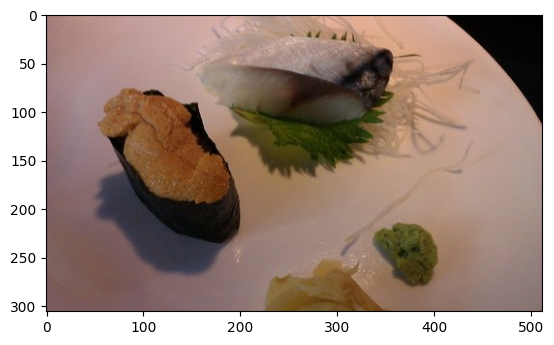

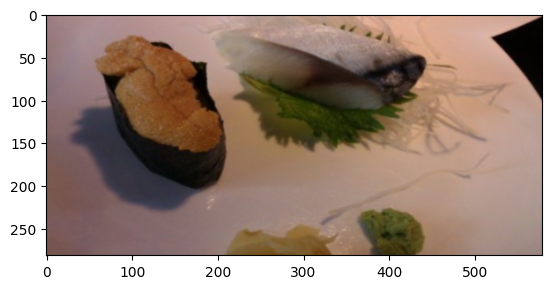

In [67]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1_percent.class_names)
target_dir = train_dir_1_percent+ '/'+target_class
random_img = random.choice(os.listdir(target_dir))
random_img_path = target_dir + '/' + random_img
plt.imshow(mpimg.imread(random_img_path))
aug_img = data_aug(tf.expand_dims(mpimg.imread(random_img_path),axis=0))
plt.figure()
plt.imshow(tf.squeeze(aug_img)/255.)


In [40]:
input_shape = (224,224,3)

base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False


inputs = tf.keras.layers.Input(shape=input_shape, name='input_layer')

x = data_aug(inputs)
x = base_model(x,training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name='global_avg_pooling')(x)

outputs = tf.keras.layers.Dense(10,activation='softmax')(x)

model_1 = tf.keras.Model(inputs,outputs)

model_1.compile(
    loss = 'categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

history_1 = model_1.fit(
    train_data_1_percent,
    epochs=5,
    steps_per_epoch= len(train_data_1_percent),
    validation_data = test_data_10_percent,
    validation_steps = int(0.25*len(test_data_10_percent)),
    callbacks= [create_tensorboard_callback('transfer_learning',
                                            '1%')]
)

Saving TensorBoard log files to: transfer_learning/1%/20231104-072336
Epoch 1/5
3/3 [==============================] - 13s 3s/step - loss: 2.4095 - accuracy: 0.0571 - val_loss: 2.2945 - val_accuracy: 0.0987
Epoch 2/5
3/3 [==============================] - 4s 2s/step - loss: 2.1526 - accuracy: 0.1714 - val_loss: 2.1503 - val_accuracy: 0.2023
Epoch 3/5
3/3 [==============================] - 4s 2s/step - loss: 1.9316 - accuracy: 0.4143 - val_loss: 2.0390 - val_accuracy: 0.2763
Epoch 4/5
3/3 [==============================] - 3s 2s/step - loss: 1.7625 - accuracy: 0.6143 - val_loss: 1.9176 - val_accuracy: 0.3914
Epoch 5/5
3/3 [==============================] - 4s 2s/step - loss: 1.6276 - accuracy: 0.6000 - val_loss: 1.8160 - val_accuracy: 0.4474


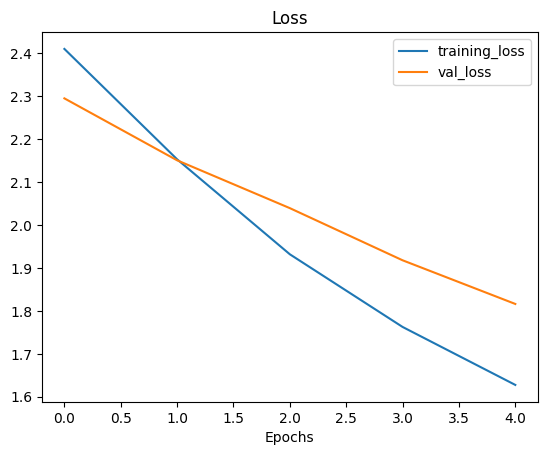

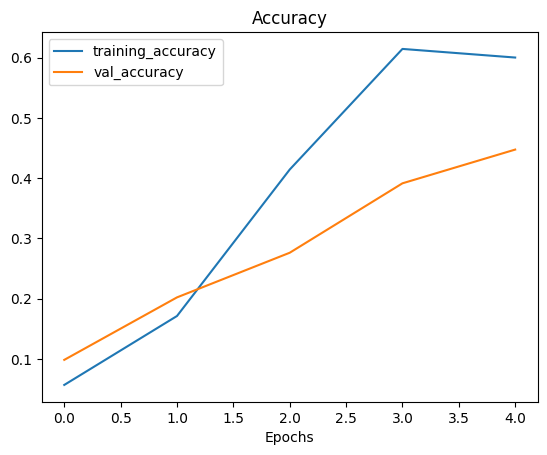

In [41]:
plot_loss_curves(history_1)

## Model 2
feature Extraction transfer learning with 10% of the data with data augmentation

In [42]:
# Creating our model callbacks
checkpoint_path = '10%_checkpoints/checkpoint.ckpt'
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    save_freq='epoch', # Save every epoch
    verbose=1
)

In [43]:
base_model = tf.keras.applications.EfficientNetB0(False)
base_model.trainable = False

inputs = tf.keras.layers.Input(input_shape)

x = data_aug(inputs)
x = base_model(x,training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)

outputs = tf.keras.layers.Dense(10,activation='softmax')(x)


model_2 = tf.keras.Model(inputs,outputs)

model_2.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history_2 = model_2.fit(
    train_data_10_percent,
    epochs = 5,
    steps_per_epoch = len(train_data_10_percent),
    validation_data = test_data_10_percent,
    validation_steps=int(0.25*len(test_data_10_percent)),
    callbacks=[checkpoint_callback]
)

Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.9820 - accuracy: 0.3600
Epoch 1: saving model to 10%_checkpoints/checkpoint.ckpt
24/24 [==============================] - 19s 485ms/step - loss: 1.9820 - accuracy: 0.3600 - val_loss: 1.4075 - val_accuracy: 0.7072
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.2881 - accuracy: 0.6973
Epoch 2: saving model to 10%_checkpoints/checkpoint.ckpt
24/24 [==============================] - 10s 412ms/step - loss: 1.2881 - accuracy: 0.6973 - val_loss: 0.9504 - val_accuracy: 0.8076
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.9793 - accuracy: 0.7653
Epoch 3: saving model to 10%_checkpoints/checkpoint.ckpt
24/24 [==============================] - 10s 406ms/step - loss: 0.9793 - accuracy: 0.7653 - val_loss: 0.7504 - val_accuracy: 0.8174
Epoch 4/5
24/24 [==============================] - ETA: 0s - loss: 0.8285 - accuracy: 0.8013
Epoch 4: saving model to 10%_checkpoints/checkpoint.ckpt
24/2

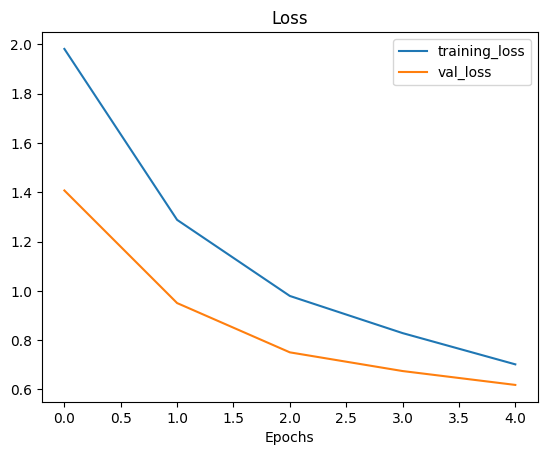

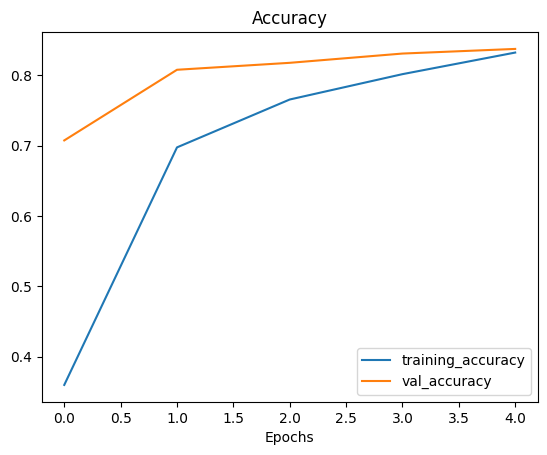

In [44]:
plot_loss_curves(history_2)

## Model 3:
> Fine Tuning in 10% of the data

In [45]:
model_2.layers

In [46]:
for layer in model_2.layers:
  print(layer, layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x79ca805f45e0> True
<keras.src.engine.sequential.Sequential object at 0x79ca78354fd0> True
<keras.src.engine.functional.Functional object at 0x79ca79c48e20> False
<keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x79ca79f179d0> True
<keras.src.layers.core.dense.Dense object at 0x79ca79c4b700> True


In [55]:
for i,layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_9 False
1 rescaling_12 False
2 normalization_6 False
3 rescaling_13 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fa

In [53]:
model_2.layers[2].layers[-10].trainable = False

In [59]:
base_model.trainable = True

for layer in base_model.layers[:-10]:
  layer.trainable = False

model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                metrics=['accuracy'])

fine_epochs = 5 + 5

history_fine = model_2.fit(train_data_10_percent,
                           epochs=fine_epochs,
                           steps_per_epoch= len(train_data_10_percent),
                           validation_data = test_data_10_percent,
                           validation_steps = int(0.25*len(test_data_10_percent)),
                           initial_epoch= history_2.epoch[-1],
                           callbacks=[create_tensorboard_callback('transfer_learning',
                                                                  'Fine_tunning_10')]
                           )

Saving TensorBoard log files to: transfer_learning/Fine_tunning_10/20231104-075048
Epoch 5/10
24/24 [==============================] - 23s 495ms/step - loss: 0.6692 - accuracy: 0.7960 - val_loss: 0.4463 - val_accuracy: 0.8503
Epoch 6/10
24/24 [==============================] - 7s 279ms/step - loss: 0.3335 - accuracy: 0.9000 - val_loss: 0.4898 - val_accuracy: 0.8405
Epoch 7/10
24/24 [==============================] - 9s 382ms/step - loss: 0.2037 - accuracy: 0.9333 - val_loss: 0.5051 - val_accuracy: 0.8438
Epoch 8/10
24/24 [==============================] - 9s 351ms/step - loss: 0.1656 - accuracy: 0.9493 - val_loss: 0.4514 - val_accuracy: 0.8470
Epoch 9/10
24/24 [==============================] - 8s 332ms/step - loss: 0.1195 - accuracy: 0.9587 - val_loss: 0.4713 - val_accuracy: 0.8651
Epoch 10/10
24/24 [==============================] - 7s 293ms/step - loss: 0.0717 - accuracy: 0.9853 - val_loss: 0.4646 - val_accuracy: 0.8651


In [63]:
history_fine.history, history_2.history

({'loss': [0.6691850423812866,
   0.33347389101982117,
   0.20373880863189697,
   0.16564226150512695,
   0.11945335566997528,
   0.07169219851493835],
  'accuracy': [0.7960000038146973,
   0.8999999761581421,
   0.9333333373069763,
   0.9493333101272583,
   0.9586666822433472,
   0.9853333234786987],
  'val_loss': [0.44633930921554565,
   0.48977938294410706,
   0.505134105682373,
   0.4514397978782654,
   0.4713326096534729,
   0.4646230638027191],
  'val_accuracy': [0.8503289222717285,
   0.8404605388641357,
   0.84375,
   0.8470394611358643,
   0.8651315569877625,
   0.8651315569877625]},
 {'loss': [1.9820196628570557,
   1.2881014347076416,
   0.9792575836181641,
   0.8284839391708374,
   0.7016619443893433],
  'accuracy': [0.36000001430511475,
   0.6973333358764648,
   0.765333354473114,
   0.8013333082199097,
   0.8320000171661377],
  'val_loss': [1.4074841737747192,
   0.9503852725028992,
   0.7503573298454285,
   0.6744920015335083,
   0.618146538734436],
  'val_accuracy': [0.

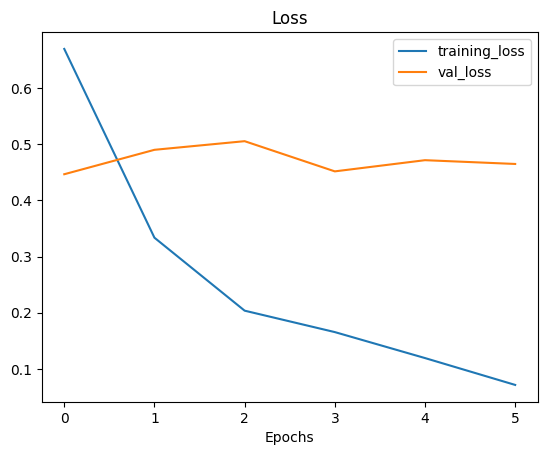

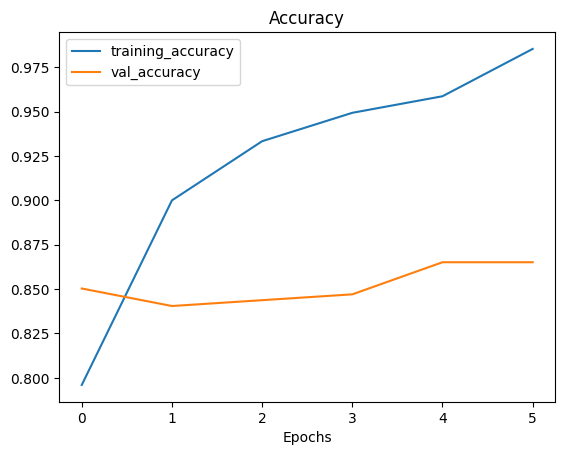

In [68]:
plot_loss_curves(history_fine)

## Model 4:
> Fine Tuning in existing model with 100% of the Data

In [69]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data('10_food_classes_all_data.zip')

--2023-11-04 08:08:53--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.128.207, 74.125.143.207, 173.194.69.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.128.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  40.0MB/s    in 13s     

2023-11-04 08:09:07 (38.0 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [70]:
train_dir = '10_food_classes_all_data/train'
test_dir = '10_food_classes_all_data/test'

In [71]:
walk_through_dir('10_food_classes_all_data')

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.

In [72]:
import tensorflow as tf

IMG_SIZE + (224,224)

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 label_mode = 'categorical',
                                                                 image_size = IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                 label_mode = 'categorical',
                                                                 image_size = IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [73]:
model_2.evaluate(test_data)

79/79 [==============================] - 10s 111ms/step - loss: 0.4454 - accuracy: 0.8604


[0.4454076588153839, 0.8604000210762024]

In [74]:
model_2.evaluate(test_data_10_percent)

79/79 [==============================] - 8s 92ms/step - loss: 0.4454 - accuracy: 0.8604


[0.44540777802467346, 0.8604000210762024]

To train a Fine_tuning model 4 we need to revert to back

In [77]:
#load Weights from checkpoint
# model_2.load_weights(checkpoint_path)

base_model = tf.keras.applications.EfficientNetB0(False)
base_model.trainable = False

inputs = tf.keras.layers.Input(input_shape)

x = data_aug(inputs)
x = base_model(x,training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)

outputs = tf.keras.layers.Dense(10,activation='softmax')(x)


model_2 = tf.keras.Model(inputs,outputs)

model_2.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history_2 = model_2.fit(
    train_data_10_percent,
    epochs = 5,
    steps_per_epoch = len(train_data_10_percent),
    validation_data = test_data_10_percent,
    validation_steps=int(0.25*len(test_data_10_percent)),
    # callbacks=[checkpoint_callback]
)

Epoch 1/5
24/24 [==============================] - 17s 368ms/step - loss: 1.9150 - accuracy: 0.3760 - val_loss: 1.3935 - val_accuracy: 0.7056
Epoch 2/5
24/24 [==============================] - 8s 335ms/step - loss: 1.2559 - accuracy: 0.7413 - val_loss: 0.9460 - val_accuracy: 0.7993
Epoch 3/5
24/24 [==============================] - 9s 365ms/step - loss: 0.9492 - accuracy: 0.7907 - val_loss: 0.7665 - val_accuracy: 0.8224
Epoch 4/5
24/24 [==============================] - 8s 318ms/step - loss: 0.8092 - accuracy: 0.7987 - val_loss: 0.6754 - val_accuracy: 0.8339
Epoch 5/5
24/24 [==============================] - 9s 360ms/step - loss: 0.6996 - accuracy: 0.8467 - val_loss: 0.6038 - val_accuracy: 0.8405


In [85]:
base_model.trainable = True
for layer in base_model.layers[:-10]:
  layer.trainable = False

In [87]:
for i, layer in enumerate(base_model.layers):
  print(i,layer.name,layer.trainable)

0 input_11 False
1 rescaling_14 False
2 normalization_7 False
3 rescaling_15 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze F

In [88]:
model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                metrics=['accuracy'])



In [89]:
history_full = model_2.fit(train_data,
                           epochs = fine_epochs,
                           steps_per_epoch=len(train_data),
                           validation_data=test_data,
                           validation_steps=int(0.25*len(test_data)),
                           initial_epoch=history_2.epoch[-1],
                           callbacks=[create_tensorboard_callback(
                              'transfer_learning',
                              'full')
                           ]
                           )

Saving TensorBoard log files to: transfer_learning/full/20231104-083554
Epoch 5/10
235/235 [==============================] - 67s 240ms/step - loss: 0.6202 - accuracy: 0.8027 - val_loss: 0.2334 - val_accuracy: 0.9408
Epoch 6/10
235/235 [==============================] - 50s 207ms/step - loss: 0.3916 - accuracy: 0.8723 - val_loss: 0.2496 - val_accuracy: 0.9227
Epoch 7/10
235/235 [==============================] - 44s 186ms/step - loss: 0.3082 - accuracy: 0.8985 - val_loss: 0.2499 - val_accuracy: 0.9128
Epoch 8/10
235/235 [==============================] - 43s 183ms/step - loss: 0.2526 - accuracy: 0.9163 - val_loss: 0.2029 - val_accuracy: 0.9243
Epoch 9/10
235/235 [==============================] - 44s 180ms/step - loss: 0.1976 - accuracy: 0.9344 - val_loss: 0.2306 - val_accuracy: 0.9243
Epoch 10/10
235/235 [==============================] - 43s 182ms/step - loss: 0.1752 - accuracy: 0.9409 - val_loss: 0.2249 - val_accuracy: 0.9211


In [91]:
# !tensorboard dev upload --logdir ./transfer_learning \
# --name 'Transfer Learning Food101 10 Classes' \
# --description 'A Series Of Expremintals' \
# --one_shot


In [92]:
model_2.evaluate(test_data)

79/79 [==============================] - 7s 72ms/step - loss: 0.2728 - accuracy: 0.9132


[0.27282577753067017, 0.9132000207901001]

In [93]:
model_2.save('my_model')

In [94]:
model_2.save('my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [97]:
from google.colab import files
files.download('my_model')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [96]:
files.download('my_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [98]:
base_model = tf.keras.applications.EfficientNetB4(False)
base_model.trainable = False

inputs = tf.keras.layers.Input(input_shape)

x = data_aug(inputs)
x = base_model(x,training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)

outputs = tf.keras.layers.Dense(10,activation='softmax')(x)


model = tf.keras.Model(inputs,outputs)

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history = model.fit(
    train_data_10_percent,
    epochs = 5,
    steps_per_epoch = len(train_data_10_percent),
    validation_data = test_data_10_percent,
    validation_steps=int(0.25*len(test_data_10_percent)),
    # callbacks=[checkpoint_callback]
)

71686520/71686520 [==============================] - 2s 0us/step
Epoch 1/5
24/24 [==============================] - 47s 1s/step - loss: 1.8617 - accuracy: 0.4227 - val_loss: 1.2489 - val_accuracy: 0.7220
Epoch 2/5
24/24 [==============================] - 23s 911ms/step - loss: 1.1826 - accuracy: 0.7187 - val_loss: 0.8600 - val_accuracy: 0.8076
Epoch 3/5
24/24 [==============================] - 19s 799ms/step - loss: 0.9180 - accuracy: 0.7760 - val_loss: 0.7220 - val_accuracy: 0.8207
Epoch 4/5
24/24 [==============================] - 21s 874ms/step - loss: 0.7800 - accuracy: 0.8013 - val_loss: 0.6586 - val_accuracy: 0.8076
Epoch 5/5
24/24 [==============================] - 17s 679ms/step - loss: 0.6992 - accuracy: 0.8213 - val_loss: 0.6000 - val_accuracy: 0.8273


In [99]:
base_model.trainable = True
for layer in base_model.layers[:-10]:
  layer.trainable = False


model.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                metrics=['accuracy'])

history_full = model.fit(train_data,
                           epochs = fine_epochs,
                           steps_per_epoch=len(train_data),
                           validation_data=test_data,
                           validation_steps=int(0.25*len(test_data)),
                           initial_epoch=history_2.epoch[-1],
                           )

Epoch 5/10
235/235 [==============================] - 141s 531ms/step - loss: 0.6401 - accuracy: 0.7937 - val_loss: 0.3242 - val_accuracy: 0.8898
Epoch 6/10
235/235 [==============================] - 103s 435ms/step - loss: 0.4481 - accuracy: 0.8520 - val_loss: 0.2795 - val_accuracy: 0.8980
Epoch 7/10
235/235 [==============================] - 100s 421ms/step - loss: 0.3611 - accuracy: 0.8775 - val_loss: 0.2564 - val_accuracy: 0.9046
Epoch 8/10
235/235 [==============================] - 87s 367ms/step - loss: 0.2818 - accuracy: 0.9068 - val_loss: 0.2447 - val_accuracy: 0.9178
Epoch 9/10
235/235 [==============================] - 78s 330ms/step - loss: 0.2696 - accuracy: 0.9143 - val_loss: 0.2994 - val_accuracy: 0.8980
Epoch 10/10
235/235 [==============================] - 77s 323ms/step - loss: 0.2103 - accuracy: 0.9275 - val_loss: 0.2851 - val_accuracy: 0.9046


In [ ]:
# model.save('last_model.h5')
# files.download('last_model.h5')